In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
#Retrieving data from most recent to a year before
query = session.query(Measurement.date, func.sum(Measurement.prcp)).group_by(Measurement.date).\
    order_by(Measurement.id.desc()).limit(365).all()

In [12]:
#Putting query into a Pandas dataframe
precip_data = pd.DataFrame(query, columns=['Date', 'Precipitation'])
precip_data = precip_data.sort_index(ascending=False)
precip_data = precip_data.reset_index()
precip_data = precip_data.drop("index", 1)
precip_data = precip_data.set_index('Date')
precip_data.head()

,Precipitation
Date,
2016-08-07,3.34
2016-08-08,0.66
2016-08-09,0.59
2016-08-10,0.00
2016-08-11,0.09


<IPython.core.display.Javascript object>


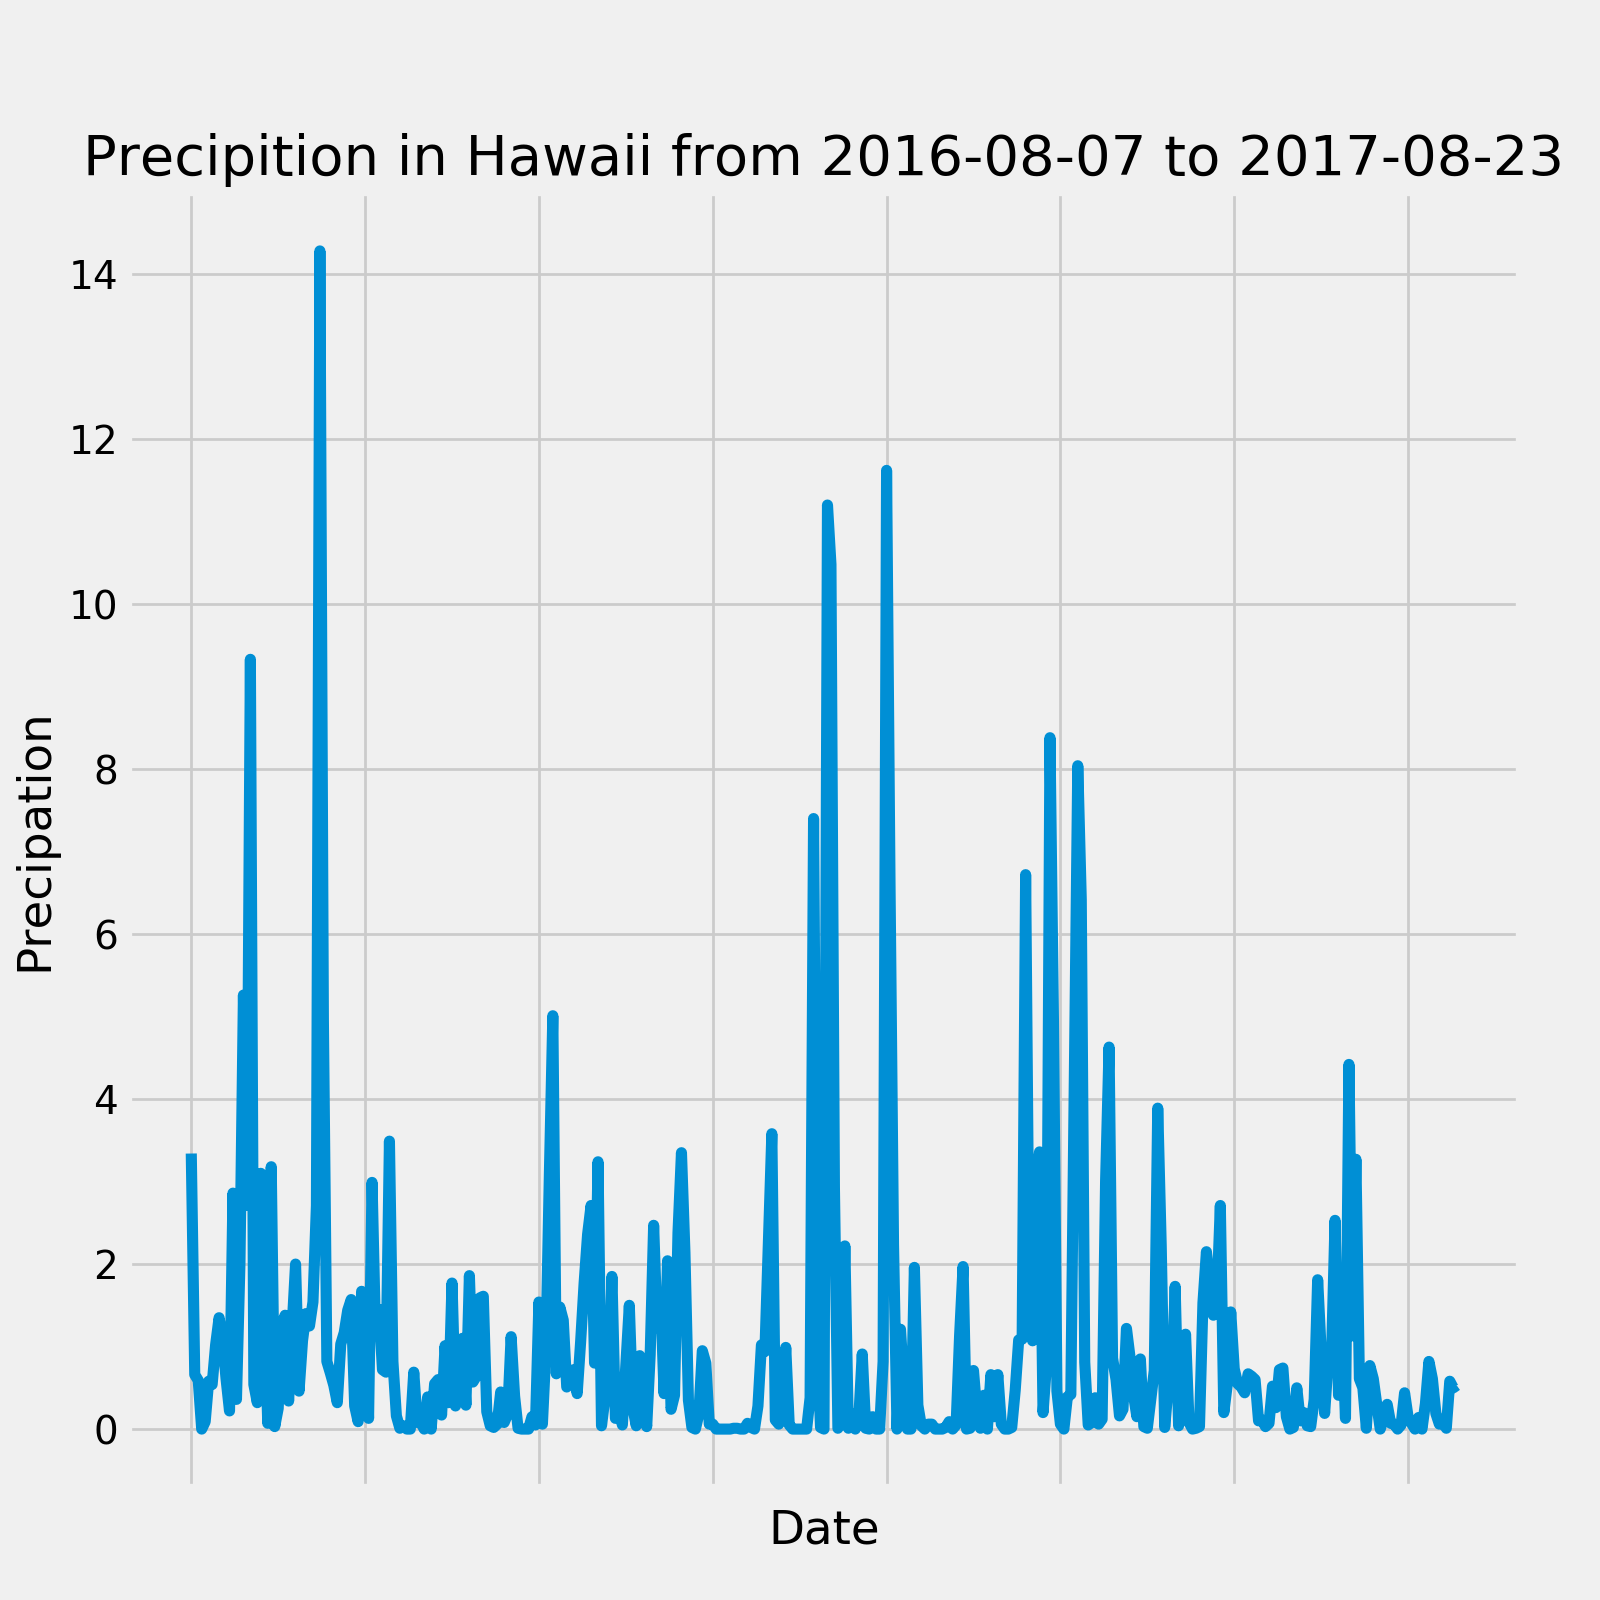

In [13]:

# Use Pandas Plotting with Matplotlib to plot the data
precip_data.plot(figsize = (8, 8), rot = 45, use_index = True, legend=False)
plt.ylabel('Precipation')
plt.xlabel('Date')
plt.title("Precipition in Hawaii from %s to %s" % (precip_data.index.min(),precip_data.index.max()))
plt.savefig("Precipitation Data")
plt.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data.describe()

,Precipitation
count,365.000000
mean,1.026795
std,1.794630
min,0.000000
25%,0.060000
50%,0.440000
75%,1.150000
max,14.280000


In [15]:
#Find number of stations in the Station table
Stations = session.query(Station.id).count()
Stations

9

In [18]:
# Find most active station based on number of readings in measurement table
active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
        
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
mostactive = "USC00519281"

high_tobs = session.query(Measurement.date, Measurement.tobs).order_by(Measurement.id.desc()). \
    filter(Measurement.station == mostactive).limit(365).all()
    
high_tobs


[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

In [21]:
tobs = pd.DataFrame(high_tobs, columns=["Date", "Temperature Observations"])
tobs.head()

,Date,Temperature Observations
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0


<IPython.core.display.Javascript object>


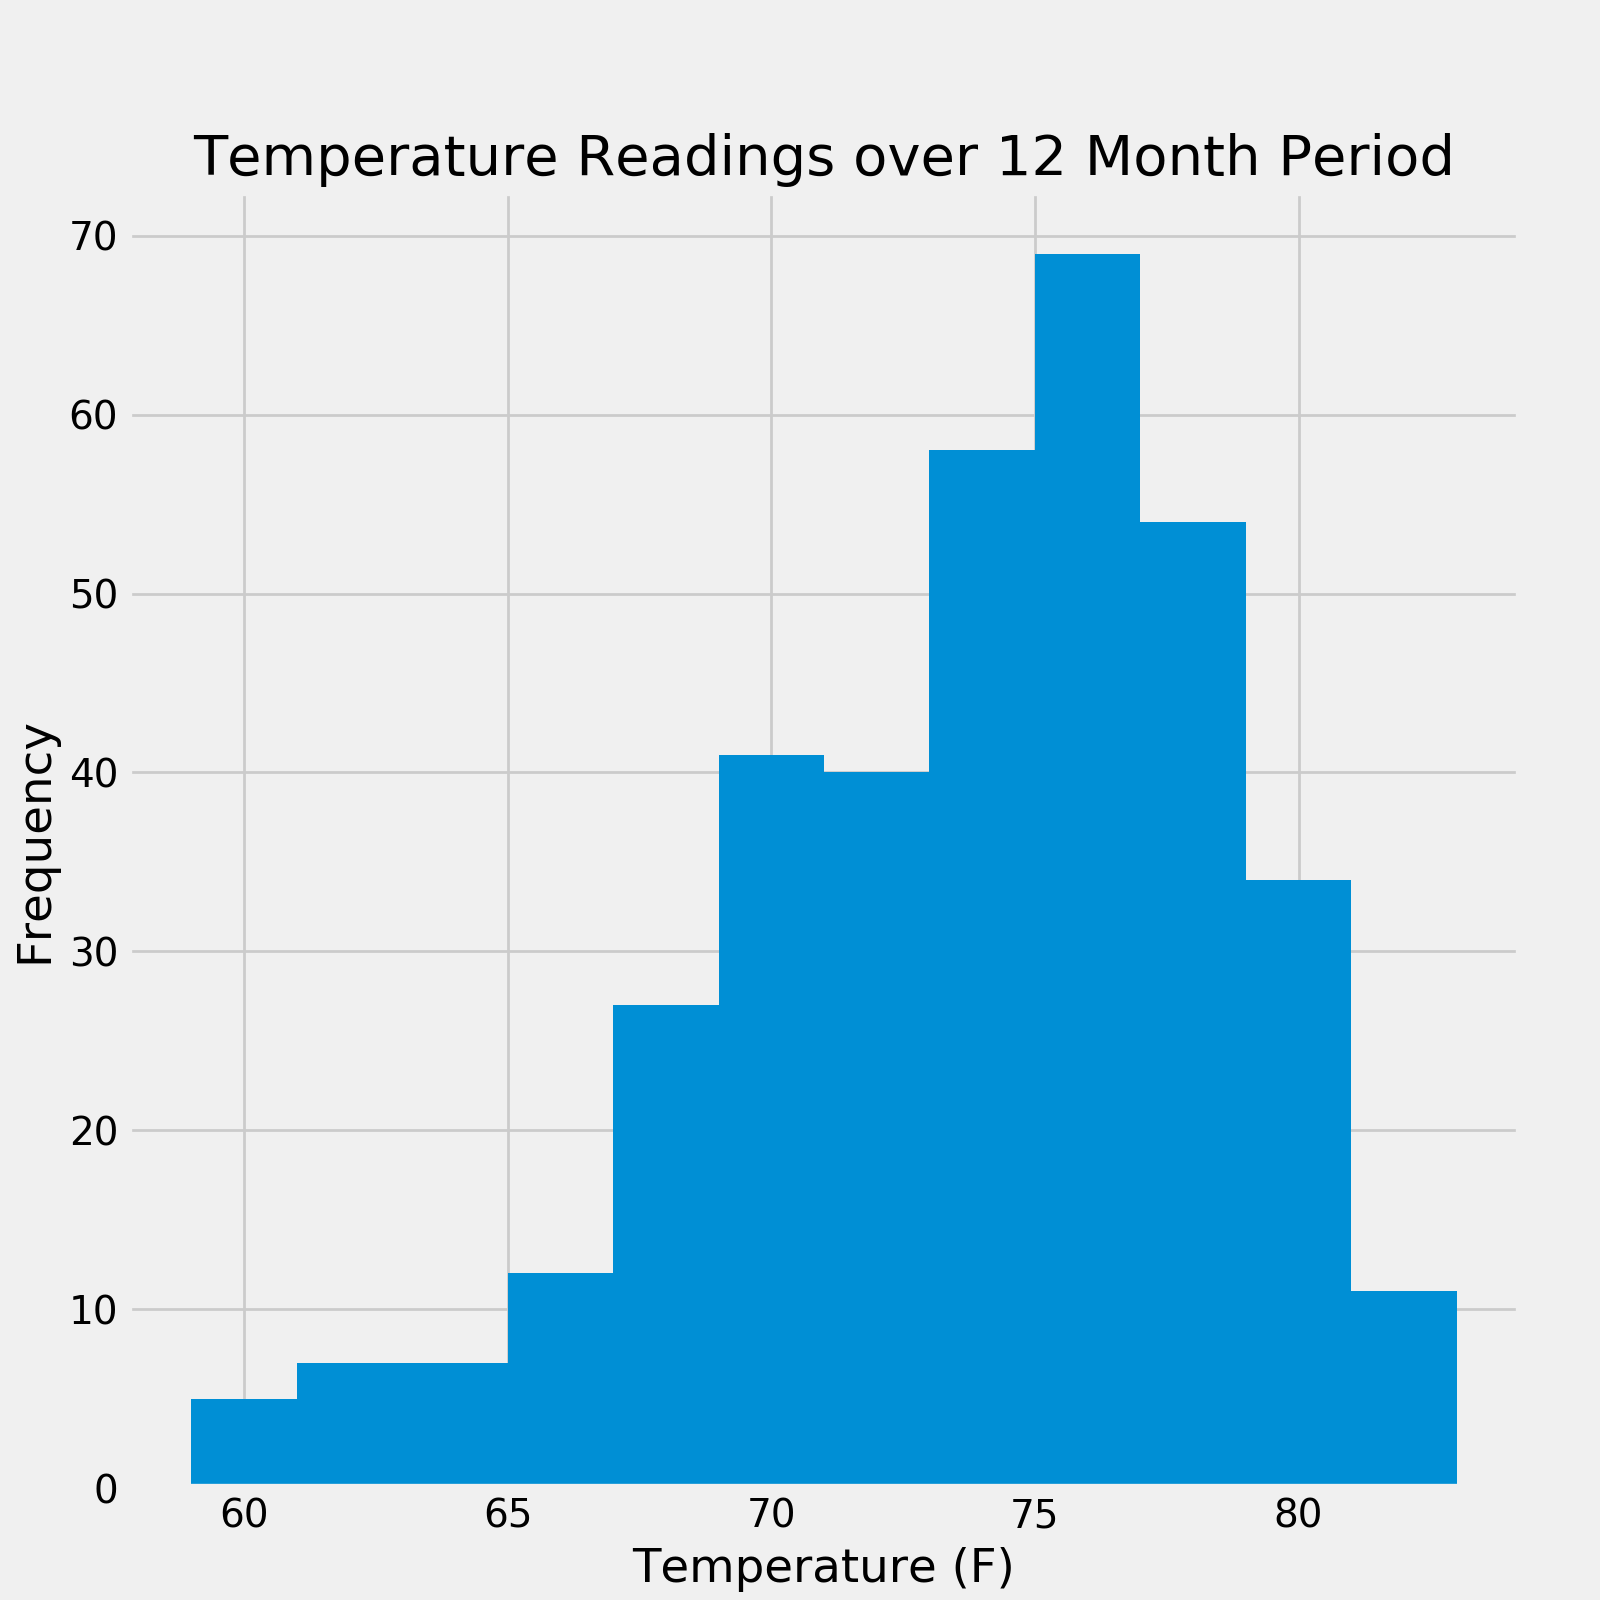

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

plt.figure(figsize = (8, 8))
plt.hist(tobs["Temperature Observations"], bins=12)
plt.grid
plt.ylabel("Frequency")
plt.xlabel("Temperature (F)")
plt.title("Temperature Readings over 12 Month Period")
plt.savefig("Temperature Histogram")
plt.show()

In [23]:
class Temp():
    def __init__(self, minimum, average, maximum):
        self.minimum = minimum
        self.average = average
        self.maximum = maximum
        
def calc_temps(start_date, end_date):
    minimum = session.query(func.min(Measurement.tobs)).filter(Measurement.date.between(start_date, end_date)).scalar()
    print(f"Minimum temp: {minimum}")
    average = session.query(func.round(func.avg(Measurement.tobs))).filter(Measurement.date.between(start_date, end_date)).scalar()
    print(f"Average temp: {average}")
    maximum = session.query(func.max(Measurement.tobs)).filter(Measurement.date.between(start_date, end_date)).scalar()
    print(f"Maximum temp: {maximum}")
    
    result = [{"Minimum":minimum},{"Maximum":maximum},{"Average":average}]
    result = Temp(minimum, average, maximum)
    return result 

trip = calc_temps('2012-02-28', '2012-03-05')
trip.minimum, trip.average, trip.maximum

Minimum temp: 62.0
Average temp: 70.0
Maximum temp: 74.0


(62.0, 70.0, 74.0)

In [24]:
#Retrieve data from year before
previousYearTemps = calc_temps('2011-07-01','2011-07-15')
previousYearTemps.minimum, previousYearTemps.average, previousYearTemps.maximum

Minimum temp: 61.0
Average temp: 74.0
Maximum temp: 81.0


(61.0, 74.0, 81.0)

<IPython.core.display.Javascript object>


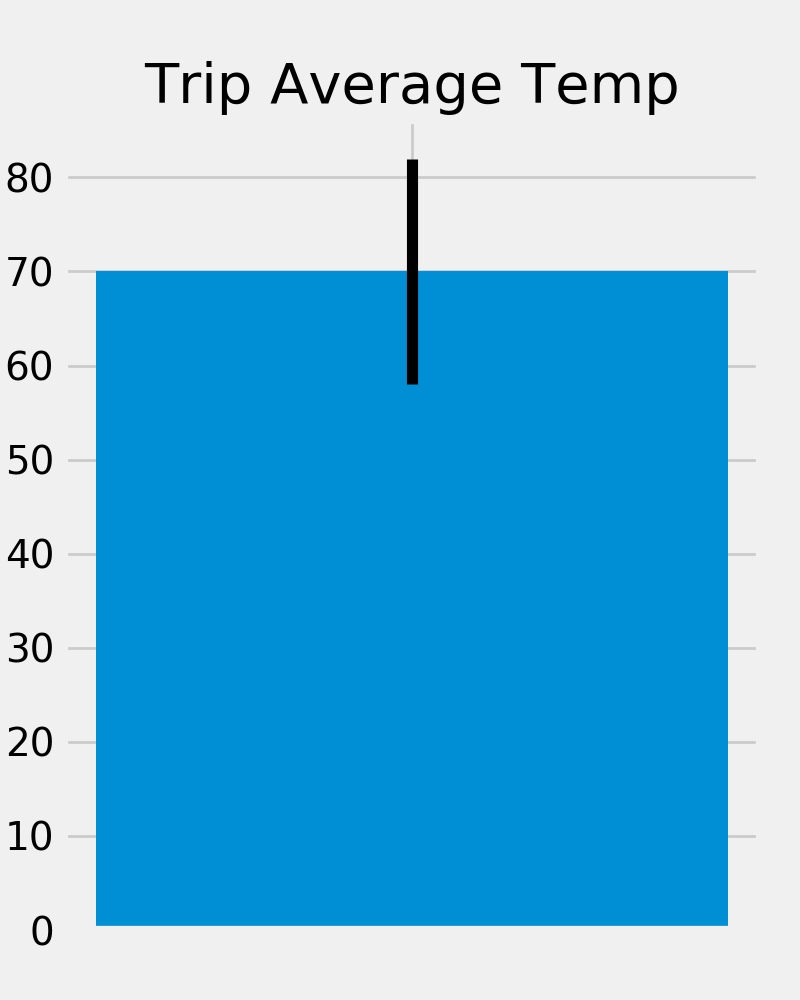

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# create bar graph
plt.figure(figsize=(4,5))
plt.title("Trip Average Temp")
plt.ylabel("Temperature (F)")
plt.bar(1, trip.average, yerr = (trip.maximum - trip.minimum), tick_label = "")

# Save an image of the chart and print to screen
plt.savefig("Temperature Analysis.png")
plt.show()

In [26]:
#Rainfall recorded at staion the year before trip
Rainfall = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, \
                                   func.sum(Measurement.prcp)).filter(Measurement.date.between('2011-07-01','2011-07-15')) \
                                    .group_by(Measurement.station).all()
Rainfall

[('USC00511918',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  0.6300000000000003),
 ('USC00513117',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  4.409999999999996),
 ('USC00514830',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  5.7599999999999945),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  17.18999999999999),
 ('USC00517948', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 0.0),
 ('USC00518838',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  7.110000000000001),
 ('USC00519281',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  7.739999999999989),
 ('USC00519397', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 2.7),
 ('USC00519523',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  4.049999999999997)]

## Optional Challenge Assignment

In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]